# 0. Import Data

In [34]:
import os
os.environ["TF_CPP_MIN_LOG_LEVEL"] = "2"

In [35]:
import pandas as pd
from sklearn.model_selection import train_test_split

In [36]:
df = pd.read_csv('Churn.csv')

In [37]:
df

,Customer ID,Gender,Senior Citizen,Partner,Dependents,tenure,Phone Service,Multiple Lines,Internet Service,Online Security,...,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn
0,7590-VHVEA,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
2,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
3,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
4,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7039,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7040,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7041,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7042,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [22]:
X = pd.get_dummies(df.drop(['Churn', 'Customer ID'], axis=1))
y = df['Churn'].apply(lambda x: 1 if x=='Yes' else 0)

In [23]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)

In [24]:
y_train.head()

3149    0
652     1
2513    0
3307    0
6269    0
Name: Churn, dtype: int64

# 1. Import Dependencies

In [25]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense
from sklearn.metrics import accuracy_score

# 2. Build and Compile Model

In [26]:
model = Sequential()
model.add(Dense(units=32, activation='relu', input_dim=len(X_train.columns)))
model.add(Dense(units=64, activation='relu'))
model.add(Dense(units=1, activation='sigmoid'))

In [27]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics='accuracy')

# 3. Fit, Predict and Evaluate

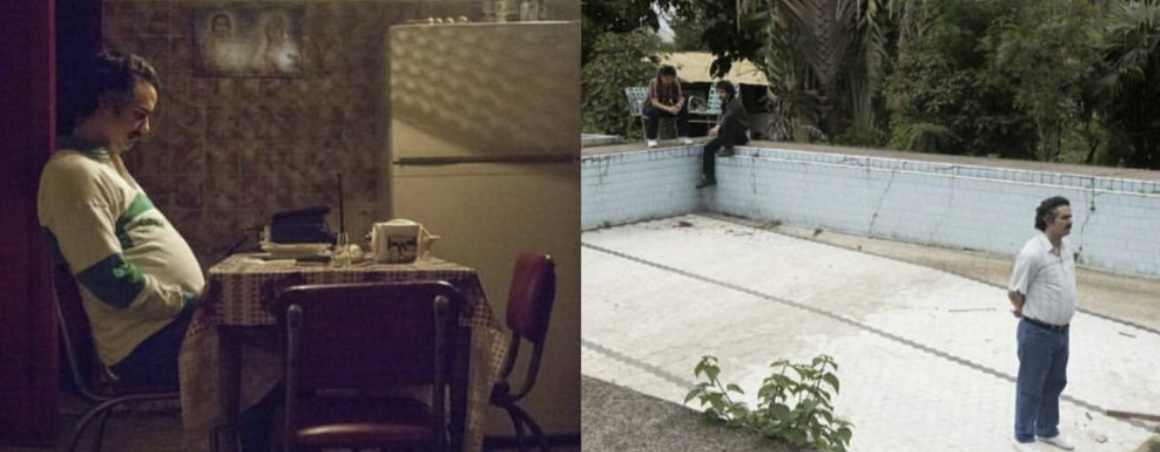

In [28]:
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
 16/177 [=>............................] - ETA: 1s - loss: 0.5600 - accuracy: 0.7461

2022-03-12 04:47:07.404168: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


177/177 [==============================] - 1s 7ms/step - loss: 0.5063 - accuracy: 0.7608
Epoch 2/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4878 - accuracy: 0.7652
Epoch 3/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4802 - accuracy: 0.7815
Epoch 4/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4739 - accuracy: 0.7796
Epoch 5/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4753 - accuracy: 0.7805
Epoch 6/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4687 - accuracy: 0.7862
Epoch 7/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4672 - accuracy: 0.7830
Epoch 8/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4653 - accuracy: 0.7844
Epoch 9/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4648 - accuracy: 0.7819
Epoch 10/100
177/177 [==============================] - 1s 7ms/step - loss: 0.4624 - accuracy: 0.7878
E

In [29]:
y_hat = model.predict(X_test)
y_hat = [0 if val < 0.5 else 1 for val in y_hat]

2022-03-12 04:49:09.842252: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


In [30]:
accuracy_score(y_test, y_hat)

0.7863733144073811

# 4. Saving and Reloading

In [31]:
model.save('tfmodel')

INFO:tensorflow:Assets written to: tfmodel/assets


In [32]:
del model 

In [33]:
model = load_model('tfmodel')